# This notebook should be ran using: [HAM10000](https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000) dataset

In [1]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image

In [2]:
# Set the image folders paths
image_folder_part1 = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'
image_folder_part2 = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2'

# Set the metadata file path
metadata_file = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv'

# Load the metadata
metadata = pd.read_csv(metadata_file)


# Create a dictionary to map diagnosis abbreviations to numerical labels
dx_mapping = {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

# Add a new column with numerical labels to the metadata
metadata['label'] = metadata['dx'].map(dx_mapping)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Diagnosis Counts:
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


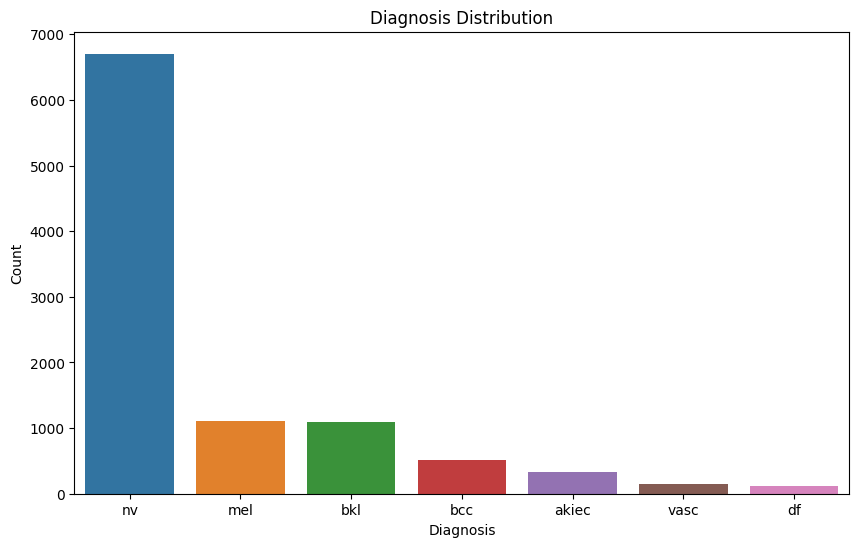


Age Distribution:
count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

Sex Distribution:
male       5406
female     4552
unknown      57
Name: sex, dtype: int64

Localization Distribution:
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64


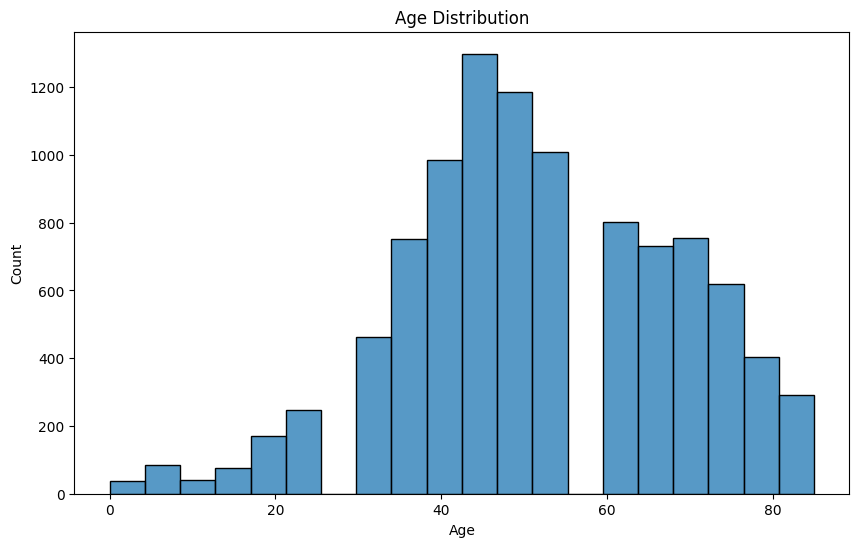

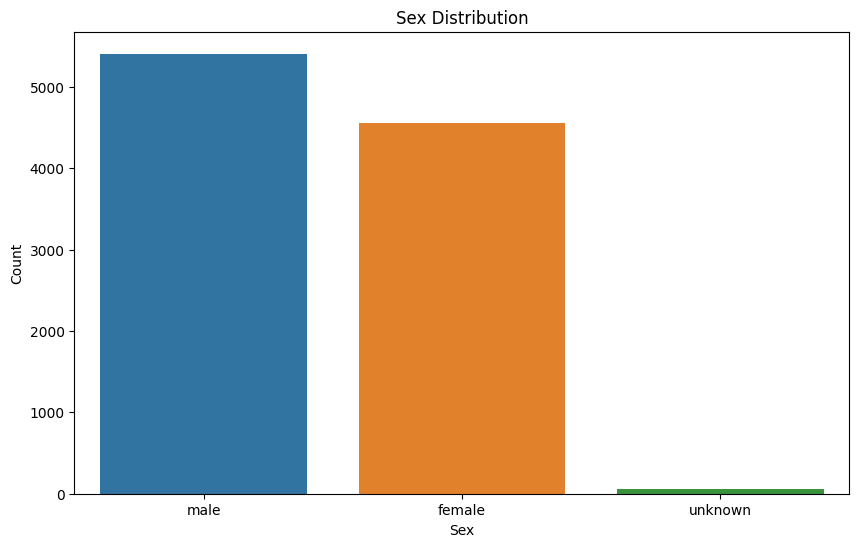

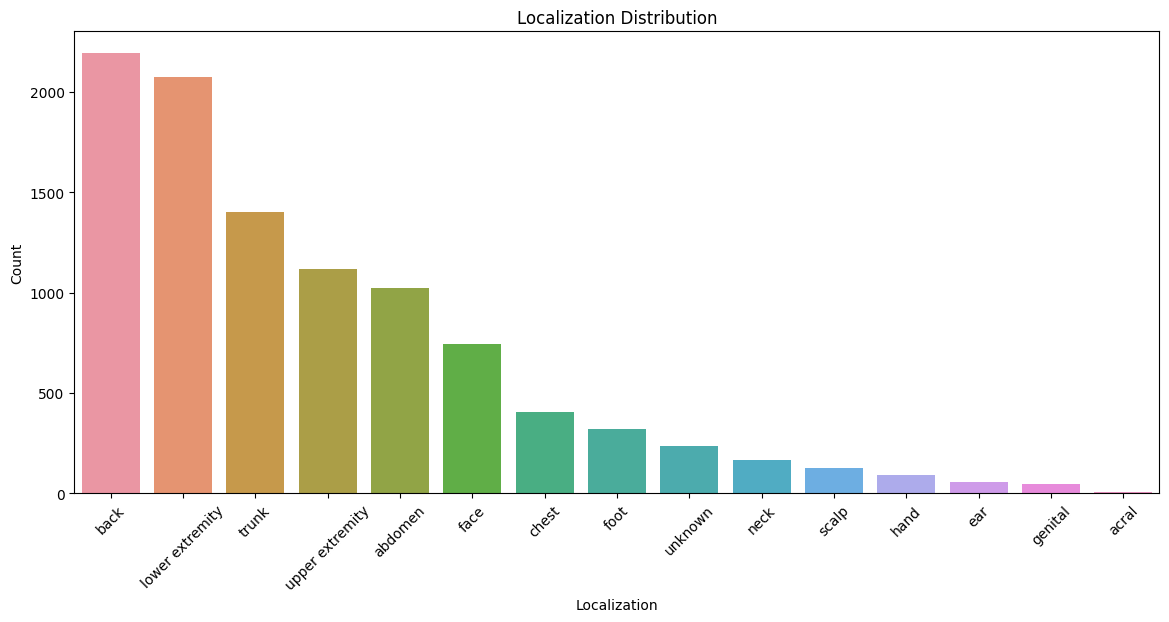

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of samples for each diagnosis
diagnosis_counts = metadata['dx'].value_counts()
print("Diagnosis Counts:")
print(diagnosis_counts)

# Plot the distribution of diagnoses
plt.figure(figsize=(10, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.title("Diagnosis Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# Calculate the distribution of age, sex, and localization
age_dist = metadata['age'].describe()
sex_dist = metadata['sex'].value_counts()
localization_dist = metadata['localization'].value_counts()

print("\nAge Distribution:")
print(age_dist)
print("\nSex Distribution:")
print(sex_dist)
print("\nLocalization Distribution:")
print(localization_dist)

# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(metadata['age'].dropna(), kde=False, bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Plot the distribution of sex
plt.figure(figsize=(10, 6))
sns.barplot(x=sex_dist.index, y=sex_dist.values)
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Plot the distribution of localization
plt.figure(figsize=(14, 6))
sns.barplot(x=localization_dist.index, y=localization_dist.values)
plt.title("Localization Distribution")
plt.xlabel("Localization")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
class SkinCancerDataset(Dataset):
    def __init__(self, metadata, image_folders, transform=None):
        self.metadata = metadata
        self.image_folders = image_folders
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        row = self.metadata.iloc[idx]
        image_id = row['image_id']
        label = row['label']

        # Find the image file
        for folder in self.image_folders:
            image_path = os.path.join(folder, f"{image_id}.jpg")
            if os.path.exists(image_path):
                break

        # Load the image
        image = Image.open(image_path).convert('RGB')

        # Apply the transform, if provided
        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
def create_model(num_classes):
    model = models.resnet101(pretrained=True)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model

num_classes = len(dx_mapping)
model = create_model(num_classes)


In [ ]:
# Set hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 1

# Split the metadata into train and test sets
train_metadata = metadata.sample(frac=0.8, random_state=42)
test_metadata = metadata.drop(train_metadata.index)

# Create the train and test datasets
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
metadata2 = train_metadata
metadata2 = metadata2.drop(metadata2[(metadata2.label==5) | (metadata2.label==1) | (metadata2.label==0) | (metadata2.label==6) | (metadata2.label==3)].index)

In [ ]:
metadata3 = train_metadata
metadata3 = metadata3.drop(metadata3[(metadata3.label==5) | (metadata3.label==4) | (metadata3.label==2) ].index)

In [ ]:
metadata31 = metadata3.drop(metadata3[(metadata3.label==5) | (metadata3.label==4) | (metadata3.label==2) ].index)
metadata32 = metadata3.drop(metadata3[(metadata3.label==5) | (metadata3.label==4) | (metadata3.label==2) ].index)
metadata33 = metadata3.drop(metadata3[(metadata3.label==5) | (metadata3.label==4) | (metadata3.label==2) ].index)
metadata34 = metadata3.drop(metadata3[(metadata3.label==5) | (metadata3.label==4) | (metadata3.label==2) ].index)

In [ ]:
metadata31

In [ ]:
result = pd.concat([train_metadata,metadata2,metadata3,metadata31,metadata32,metadata33,metadata34])

In [ ]:
diagnosis_counts = result['dx'].value_counts()
print("Diagnosis Counts:")
print(diagnosis_counts)

# Plot the distribution of diagnoses
plt.figure(figsize=(10, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.title("Diagnosis Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [ ]:
data_transform2 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
    transforms.RandomRotation(degrees=(0, 90)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

data_transform3 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

data_transform4 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomPosterize(bits=2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])



data_transform5 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomAdjustSharpness(sharpness_factor=2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


data_transform6 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
from torch.utils.data import Dataset, DataLoader, ConcatDataset
train_dataset = SkinCancerDataset(train_metadata, [image_folder_part1, image_folder_part2], transform=data_transform)
train_dataset2 = SkinCancerDataset(metadata2, [image_folder_part1, image_folder_part2], transform=data_transform2)
train_dataset3 = SkinCancerDataset(metadata3, [image_folder_part1, image_folder_part2], transform=data_transform2)
train_dataset31 = SkinCancerDataset(metadata3, [image_folder_part1, image_folder_part2], transform=data_transform3)
train_dataset32 = SkinCancerDataset(metadata3, [image_folder_part1, image_folder_part2], transform=data_transform4)
train_dataset33 = SkinCancerDataset(metadata3, [image_folder_part1, image_folder_part2], transform=data_transform5)
train_dataset34 = SkinCancerDataset(metadata3, [image_folder_part1, image_folder_part2], transform=data_transform6)
test_dataset = SkinCancerDataset(test_metadata, [image_folder_part1, image_folder_part2], transform=data_transform)

train_datasetConcat = ConcatDataset([train_dataset,train_dataset2,train_dataset3,train_dataset31,train_dataset32,train_dataset33,train_dataset34])


# Create the data loaders
train_loader = DataLoader(train_datasetConcat, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
len(train_dataset)

In [ ]:
len(train_datasetConcat)

In [ ]:
# Move the model to GPU, if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
i = 0
# Train the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        i = i+1
        if i%320==0:
            print("i: ",i)

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Function to calculate predictions
def get_predictions(outputs):
    _, predicted = torch.max(outputs, 1)
    return predicted

# Evaluate the model
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        predictions = get_predictions(outputs)
        
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
class_report = classification_report(all_labels, all_predictions, target_names=list(dx_mapping.keys()))
print("\nClassification Report:")
print(class_report)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Create a confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=list(dx_mapping.keys()), yticklabels=list(dx_mapping.keys()))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
!pip install pytorch-gradcam

In [ ]:
from gradcam import GradCAM, GradCAMpp
from gradcam.utils import visualize_cam


In [ ]:
from torchvision.utils import make_grid

data_transformGrad = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


def apply_gradcam(image_path, model, target_layer):
    # Load the image and apply the same preprocessing as during training
    img = Image.open(image_path).convert("RGB")
    input_tensor = data_transformGrad(img).unsqueeze(0).to(device)
    x = image_path.split("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/")
    x = x[1].split(".")
    metadataPred = metadata.loc[(metadata['image_id'] == x[0])]
    
    
    outputs = model(input_tensor)
    predictions = get_predictions(outputs)

    # Create Grad-CAM and Grad-CAM++ objects
    gradcam = GradCAM(model, target_layer)
    gradcam_pp = GradCAMpp(model, target_layer)

    # Get the Grad-CAM and Grad-CAM++ masks
    mask_gradcam, _ = gradcam(input_tensor)
    mask_gradcam_pp, _ = gradcam_pp(input_tensor)

    # Visualize the Grad-CAM and Grad-CAM++ results
    heatmap_gradcam, result_gradcam = visualize_cam(mask_gradcam, input_tensor)
    heatmap_gradcam_pp, result_gradcam_pp = visualize_cam(mask_gradcam_pp, input_tensor)

    # Convert tensors back to PIL images
    result_gradcam = transforms.ToPILImage()(result_gradcam)
    result_gradcam_pp = transforms.ToPILImage()(result_gradcam_pp)
    keys = [k for k, v in dx_mapping.items() if v == predictions]

    
    origText = "Original Image. Label: " + metadataPred['dx'].values[0]
    gradText = "Grad-CAM. Prediction: " +  keys[0]
    gradPPText = "Grad-CAM++"

    # Display the original image, Grad-CAM heatmap, and Grad-CAM++ heatmap
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title(origText)
    plt.imshow(img)
    plt.axis("off")


    plt.subplot(1, 3, 2)
    plt.title(gradText)
    plt.imshow(result_gradcam)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title(gradPPText)
    plt.imshow(result_gradcam_pp)
    plt.axis("off")

    plt.show()

In [ ]:
# Choose the target layer in ResNet50
target_layer = model.layer4[-1]

# Choose an image from the dataset
sample_image_path = os.path.join(image_folder_part1, "ISIC_0027640.jpg")

# Apply Grad-CAM and visualize the results
apply_gradcam(sample_image_path, model, target_layer)


# The Metadata text classification model ↓


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
from torch import nn
from torch.nn import functional as F

# Load the metadata
metadata = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

# Convert categorical columns to numerical values
le = LabelEncoder()
metadata['dx'] = le.fit_transform(metadata['dx'])
metadata['dx_type'] = le.fit_transform(metadata['dx_type'])
metadata['sex'] = le.fit_transform(metadata['sex'])
metadata['localization'] = le.fit_transform(metadata['localization'])

# Standardize numerical columns
scaler = StandardScaler()
metadata['age'] = scaler.fit_transform(metadata['age'].values.reshape(-1,1))

# Split the data
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(metadata.drop(['lesion_id', 'image_id'], axis=1), metadata['dx'], test_size=0.2, random_state=42)


In [ ]:
# Replace missing values with a default value, here we use -1
X_train_meta = X_train_meta.fillna(-1)
# Ensure all data is numeric
X_train_meta = X_train_meta.apply(pd.to_numeric)

# Replace missing values with a default value, here we use -1
y_train_meta = y_train_meta.fillna(-1)
# Ensure all data is numeric
y_train_meta = y_train_meta.apply(pd.to_numeric)

# Replace missing values with a default value, here we use -1
X_test_meta = X_test_meta.fillna(-1)
# Ensure all data is numeric
X_test_meta = X_test_meta.apply(pd.to_numeric)

# Replace missing values with a default value, here we use -1
y_test_meta = y_test_meta.fillna(-1)
# Ensure all data is numeric
y_test_meta = y_test_meta.apply(pd.to_numeric)




In [ ]:
# Convert pandas dataframes to tensors
X_train_meta = torch.tensor(X_train_meta.values).float()
y_train_meta = torch.tensor(y_train_meta.values).long()

# Convert pandas dataframes to tensors
X_test_meta = torch.tensor(X_test_meta.values).float()
y_test_meta = torch.tensor(y_test_meta.values).long()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class MetaDataNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(MetaDataNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Define the model
model_meta = MetaDataNN(X_train_meta.shape[1], len(le.classes_))

# Move the model to GPU, if available
model_meta = model_meta.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_meta.parameters())

# Convert train data to GPU, if available
X_train_meta = X_train_meta.to(device)
y_train_meta = y_train_meta.to(device)


# Training loop
for epoch in range(400):
    optimizer.zero_grad()
    output = model_meta(X_train_meta)
    loss = criterion(output, y_train_meta)
    loss.backward()
    optimizer.step()


In [ ]:
from sklearn.metrics import accuracy_score

def test_accuracy(model, X_test, y_test):
    # Ensure model is in evaluation mode
    model.eval()
    
    # Predict the labels
    with torch.no_grad():  # Turn off gradients for prediction, saves memory and computations
        predictions = model(X_test)
    
    # Get the class with highest probability
    _, predicted_class = torch.max(predictions, 1)
    
    # Move tensors to CPU
    predicted_class = predicted_class.cpu()
    y_test = y_test.cpu()

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predicted_class)

    return accuracy

# Convert test data to GPU, if available
X_test_meta = X_test_meta.to(device)
y_test_meta = y_test_meta.to(device)

# Test accuracy
accuracy = test_accuracy(model_meta, X_test_meta, y_test_meta)
print(f'The accuracy of the model on the test set is: {accuracy*100:.2f}%')